<a href="https://colab.research.google.com/github/ManuelSey/MLinFinance/blob/main/Carnivore_FlagDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fiftyone


In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')



Mounted at /content/drive



https://docs.voxel51.com/index.html
Choose classes and create datasets

In [3]:
# !!!!! Do not execute this cell, till your choice of classes is not recorded!!!!!
# !!!!! UPDATE classes below!!!!!
cl1 = "Carnivore"
cl2 = "Flag"

import fiftyone.zoo as foz
import fiftyone as fo

#dataset.delete()
dataset = foz.load_zoo_dataset(
    "open-images-v7",
    split="train",
    label_types=["detections"],  # Load detection labels
    # UPDATE
    classes = [cl1, cl2],
    max_samples= 1500,
)

# change the directory below
data_dir = "/content/drive/My Drive/ML_IPData7"
! mkdir $data_dir
patches =  dataset.to_patches("ground_truth")
from fiftyone import ViewField as F

ds = patches.match(
    F("ground_truth.label").is_in(
        # UPDATE
        [cl1, cl2]
    )
)

# Export the object patches as an image classification directory tree
ds.export(
   export_dir=data_dir,
   dataset_type=fo.types.ImageClassificationDirectoryTree,
   label_field="ground_truth",
)

INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/open-images-v7/train' if necessary


Necessary images already downloaded


INFO:fiftyone.utils.openimages:Necessary images already downloaded


Existing download of split 'train' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'train' is sufficient


Loading 'open-images-v7' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'open-images-v7' split 'train'


 100% |███████████████| 1500/1500 [21.5s elapsed, 0s remaining, 80.9 samples/s]       


INFO:eta.core.utils: 100% |███████████████| 1500/1500 [21.5s elapsed, 0s remaining, 80.9 samples/s]       


Dataset 'open-images-v7-train-1500' created


INFO:fiftyone.zoo.datasets:Dataset 'open-images-v7-train-1500' created


mkdir: cannot create directory ‘/content/drive/My’: Operation not supported
mkdir: cannot create directory ‘Drive/ML_IPData7’: No such file or directory
Directory '/content/drive/My Drive/ML_IPData7' already exists; export will be merged with existing files


Detected an image classification exporter and a label field 'ground_truth' of type <class 'fiftyone.core.labels.Detection'>. Exporting image patches...


INFO:fiftyone.utils.data.exporters:Detected an image classification exporter and a label field 'ground_truth' of type <class 'fiftyone.core.labels.Detection'>. Exporting image patches...


 100% |███████████████| 4542/4542 [2.1m elapsed, 0s remaining, 30.2 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 4542/4542 [2.1m elapsed, 0s remaining, 30.2 samples/s]      


In [12]:
ds.first()

<PatchView: {
    'id': '675d796864b2c029094f7f55',
    'media_type': 'image',
    'sample_id': '675d796864b2c029094f7f58',
    'filepath': '/root/fiftyone/open-images-v7/train/data/e1ecf028d5731726.jpg',
    'tags': ['train'],
    'metadata': None,
    'created_at': datetime.datetime(2024, 12, 14, 12, 26, 16, 811000),
    'last_modified_at': datetime.datetime(2024, 12, 14, 12, 26, 16, 811000),
    'ground_truth': <Detection: {
        'id': '675d796864b2c029094f7f55',
        'attributes': {},
        'tags': [],
        'label': 'Carnivore',
        'bounding_box': [0.288243, 0.11375, 0.515802, 0.299375],
        'mask': None,
        'confidence': None,
        'index': None,
        'IsOccluded': False,
        'IsTruncated': False,
        'IsGroupOf': False,
        'IsDepiction': True,
        'IsInside': False,
    }>,
}>

In [13]:
ds.first().ground_truth

<Detection: {
    'id': '675d796864b2c029094f7f55',
    'attributes': {},
    'tags': [],
    'label': 'Carnivore',
    'bounding_box': [0.288243, 0.11375, 0.515802, 0.299375],
    'mask': None,
    'confidence': None,
    'index': None,
    'IsOccluded': False,
    'IsTruncated': False,
    'IsGroupOf': False,
    'IsDepiction': True,
    'IsInside': False,
}>

In [14]:
ds

Dataset:     open-images-v7-train-1500
Media type:  image
Num patches: 4542
Patch fields:
    id:               fiftyone.core.fields.ObjectIdField
    sample_id:        fiftyone.core.fields.ObjectIdField
    filepath:         fiftyone.core.fields.StringField
    tags:             fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    created_at:       fiftyone.core.fields.DateTimeField
    last_modified_at: fiftyone.core.fields.DateTimeField
    ground_truth:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detection)
View stages:
    1. ToPatches(field='ground_truth', config=None)
    2. Match(filter={'$expr': {'$in': [...]}})

In [15]:
patches

Dataset:     open-images-v7-train-1500
Media type:  image
Num patches: 12621
Patch fields:
    id:               fiftyone.core.fields.ObjectIdField
    sample_id:        fiftyone.core.fields.ObjectIdField
    filepath:         fiftyone.core.fields.StringField
    tags:             fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    created_at:       fiftyone.core.fields.DateTimeField
    last_modified_at: fiftyone.core.fields.DateTimeField
    ground_truth:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detection)
View stages:
    1. ToPatches(field='ground_truth', config=None)

In [16]:
print(ds.count())

4542


In [17]:
from google.colab import drive
drive.flush_and_unmount()  # Unmount Drive
drive.mount('/content/drive')  # Remount Drive

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [18]:
import os

data_dir = "/content/drive/My Drive/ML_IPData7"

# Check if the dataset directory exists
if os.path.exists(data_dir):
    print("Dataset directory exists:", data_dir)
    subdirs = os.listdir(data_dir)
    print("Subdirectories found:", subdirs)
else:
    print("Dataset directory not found:", data_dir)

Dataset directory exists: /content/drive/My Drive/ML_IPData7
Subdirectories found: ['Carnivore', 'Flag']


In [19]:
for subdir in subdirs:
    class_dir = os.path.join(data_dir, subdir)
    if os.path.isdir(class_dir):
        num_files = len(os.listdir(class_dir))
        print(f"Class '{subdir}' contains {num_files} images.")

Class 'Carnivore' contains 513 images.
Class 'Flag' contains 4029 images.


In [1]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

carnivore_dir = "/content/drive/My Drive/ML_IPData7/Carnivore"
flag_dir = "/content/drive/My Drive/ML_IPData7/Flag"

print("Carnivore directory exists:", os.path.exists(carnivore_dir))
print("Flag directory exists:", os.path.exists(flag_dir))
print("Carnivore files:", len(os.listdir(carnivore_dir)))
print("Flag files:", len(os.listdir(flag_dir)))

Carnivore directory exists: True
Flag directory exists: True
Carnivore files: 513
Flag files: 4029


In [3]:
import shutil
import random
import os

balanced_dir = "/content/drive/My Drive/ML_IPData7_Balanced"
os.makedirs(balanced_dir, exist_ok=True)

# Copying Carnivore images
carnivore_balanced_dir = os.path.join(balanced_dir, "Carnivore")
os.makedirs(carnivore_balanced_dir, exist_ok=True)
for file in os.listdir(carnivore_dir):
    src = os.path.join(carnivore_dir, file)
    dst = os.path.join(carnivore_balanced_dir, file)
    shutil.copy(src, dst)

# Copying a random selection of Flag images
flag_balanced_dir = os.path.join(balanced_dir, "Flag")
os.makedirs(flag_balanced_dir, exist_ok=True)
flag_files = os.listdir(flag_dir)
selected_flag_files = random.sample(flag_files, 513)

for file in selected_flag_files:
    src = os.path.join(flag_dir, file)
    dst = os.path.join(flag_balanced_dir, file)
    shutil.copy(src, dst)

print("Balanced dataset created at:", balanced_dir)

Balanced dataset created at: /content/drive/My Drive/ML_IPData7_Balanced


In [4]:
carnivore_balanced_dir = os.path.join(balanced_dir, "Carnivore")
flag_balanced_dir = os.path.join(balanced_dir, "Flag")

print("Balanced Carnivore images:", len(os.listdir(carnivore_balanced_dir)))
print("Balanced Flag images:", len(os.listdir(flag_balanced_dir)))

Balanced Carnivore images: 513
Balanced Flag images: 550


In [5]:
import random
import os

# Select 513 files to keep
flag_files = os.listdir(flag_balanced_dir)
extra_files = len(flag_files) - 513
if extra_files > 0:
    files_to_remove = random.sample(flag_files, extra_files)
    for file in files_to_remove:
        os.remove(os.path.join(flag_balanced_dir, file))
    print(f"Removed {extra_files} extra files from Flag directory.")
else:
    print("No extra files to remove.")

Removed 37 extra files from Flag directory.


In [6]:
print("Final Balanced Carnivore images:", len(os.listdir(carnivore_balanced_dir)))
print("Final Balanced Flag images:", len(os.listdir(flag_balanced_dir)))

Final Balanced Carnivore images: 513
Final Balanced Flag images: 513


In [7]:
#Preprocessing Stage
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Parameters
IMG_SIZE = (128, 128)  # Resize images to 128x128

# Function to preprocess images
def load_and_preprocess_images(directory, label):
    images, labels = [], []
    for file in os.listdir(directory):
        file_path = os.path.join(directory, file)
        try:
            img = cv2.imread(file_path)
            img = cv2.resize(img, IMG_SIZE)  # Resize image
            images.append(img)
            labels.append(label)
        except Exception as e:
            print(f"Error processing image {file_path}: {e}")
    return np.array(images), np.array(labels)

# Load and preprocess images
X_carnivore, y_carnivore = load_and_preprocess_images(carnivore_balanced_dir, 0)  # Label 0 for Carnivore
X_flag, y_flag = load_and_preprocess_images(flag_balanced_dir, 1)  # Label 1 for Flag

# Combine datasets
X = np.concatenate((X_carnivore, X_flag), axis=0)
y = np.concatenate((y_carnivore, y_flag), axis=0)

# Normalize pixel values to [0, 1]
X = X / 255.0

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Error processing image /content/drive/My Drive/ML_IPData7_Balanced/Flag/001180.jpg: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Training set size: 820
Testing set size: 205


In [8]:
import os

# Function to remove invalid images
def remove_invalid_images(directory):
    for file in os.listdir(directory):
        file_path = os.path.join(directory, file)
        try:
            img = cv2.imread(file_path)
            if img is None:
                print(f"Removing invalid file: {file_path}")
                os.remove(file_path)
        except Exception as e:
            print(f"Error processing file {file_path}: {e}")
            os.remove(file_path)

# Remove invalid images from both directories
remove_invalid_images(carnivore_balanced_dir)
remove_invalid_images(flag_balanced_dir)

Removing invalid file: /content/drive/My Drive/ML_IPData7_Balanced/Flag/001180.jpg


In [9]:
# Reload and preprocess images
X_carnivore, y_carnivore = load_and_preprocess_images(carnivore_balanced_dir, 0)  # Label 0 for Carnivore
X_flag, y_flag = load_and_preprocess_images(flag_balanced_dir, 1)  # Label 1 for Flag

# Combine datasets
X = np.concatenate((X_carnivore, X_flag), axis=0)
y = np.concatenate((y_carnivore, y_flag), axis=0)

# Normalize pixel values to [0, 1]
X = X / 255.0

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 820
Testing set size: 205


In [10]:
# Flatten the images
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

print("Flattened training data shape:", X_train_flat.shape)
print("Flattened testing data shape:", X_test_flat.shape)

Flattened training data shape: (820, 49152)
Flattened testing data shape: (205, 49152)


In [11]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

print("Reduced training data shape:", X_train_pca.shape)
print("Reduced testing data shape:", X_test_pca.shape)

Reduced training data shape: (820, 334)
Reduced testing data shape: (205, 334)


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Use 5 neighbors
knn.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = knn.predict(X_test_pca)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("k-NN Classifier Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Carnivore", "Flag"]))

k-NN Classifier Accuracy: 0.5902439024390244

Classification Report:
               precision    recall  f1-score   support

   Carnivore       0.56      0.80      0.66       100
        Flag       0.67      0.39      0.49       105

    accuracy                           0.59       205
   macro avg       0.61      0.60      0.57       205
weighted avg       0.62      0.59      0.57       205



In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for k
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Perform Grid Search with cross-validation
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

# Get the best parameters and accuracy
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"Best k: {best_k}")
print(f"Best cross-validation accuracy: {best_score}")

# Train k-NN with the best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_pca, y_train)
y_pred_knn_best = knn_best.predict(X_test_pca)

# Evaluate the tuned k-NN model
accuracy_tuned_knn = accuracy_score(y_test, y_pred_knn_best)
print("Tuned k-NN Classifier Accuracy:", accuracy_tuned_knn)
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn_best, target_names=["Carnivore", "Flag"]))

Best k: 11
Best cross-validation accuracy: 0.625609756097561
Tuned k-NN Classifier Accuracy: 0.6146341463414634

Classification Report:
               precision    recall  f1-score   support

   Carnivore       0.57      0.85      0.68       100
        Flag       0.73      0.39      0.51       105

    accuracy                           0.61       205
   macro avg       0.65      0.62      0.60       205
weighted avg       0.65      0.61      0.59       205



In [14]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_pca, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test_pca)

# Evaluate performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, target_names=["Carnivore", "Flag"]))

Random Forest Classifier Accuracy: 0.7414634146341463

Classification Report:
               precision    recall  f1-score   support

   Carnivore       0.69      0.85      0.76       100
        Flag       0.82      0.64      0.72       105

    accuracy                           0.74       205
   macro avg       0.75      0.74      0.74       205
weighted avg       0.76      0.74      0.74       205



In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search_rf.fit(X_train_pca, y_train)

# Get the best parameters and accuracy
best_rf = grid_search_rf.best_estimator_
best_params = grid_search_rf.best_params_
print("Best parameters:", best_params)

# Evaluate the tuned model
y_pred_rf_tuned = best_rf.predict(X_test_pca)
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)

print("Tuned Random Forest Accuracy:", accuracy_rf_tuned)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_tuned, target_names=["Carnivore", "Flag"]))

Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Tuned Random Forest Accuracy: 0.7170731707317073

Classification Report:
               precision    recall  f1-score   support

   Carnivore       0.68      0.79      0.73       100
        Flag       0.76      0.65      0.70       105

    accuracy                           0.72       205
   macro avg       0.72      0.72      0.72       205
weighted avg       0.72      0.72      0.72       205



In [17]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train SGD Classifier
sgd = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd.fit(X_train_pca, y_train)

# Predict on the test set
y_pred_sgd = sgd.predict(X_test_pca)

# Evaluate performance
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print("SGD Classifier Accuracy:", accuracy_sgd)
print("\nClassification Report:\n", classification_report(y_test, y_pred_sgd, target_names=["Carnivore", "Flag"]))

SGD Classifier Accuracy: 0.7317073170731707

Classification Report:
               precision    recall  f1-score   support

   Carnivore       0.71      0.77      0.74       100
        Flag       0.76      0.70      0.73       105

    accuracy                           0.73       205
   macro avg       0.73      0.73      0.73       205
weighted avg       0.73      0.73      0.73       205



In [18]:
from sklearn.neural_network import MLPClassifier

# Train MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train_pca, y_train)

# Predict on the test set
y_pred_mlp = mlp.predict(X_test_pca)

# Evaluate performance
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("MLP Classifier Accuracy:", accuracy_mlp)
print("\nClassification Report:\n", classification_report(y_test, y_pred_mlp, target_names=["Carnivore", "Flag"]))

MLP Classifier Accuracy: 0.7463414634146341

Classification Report:
               precision    recall  f1-score   support

   Carnivore       0.72      0.79      0.75       100
        Flag       0.78      0.70      0.74       105

    accuracy                           0.75       205
   macro avg       0.75      0.75      0.75       205
weighted avg       0.75      0.75      0.75       205



In [19]:
import numpy as np

# Identify correct and incorrect predictions
correct_indices = np.where(y_pred_mlp == y_test)[0]
incorrect_indices = np.where(y_pred_mlp != y_test)[0]

print("Number of correct predictions:", len(correct_indices))
print("Number of incorrect predictions:", len(incorrect_indices))

Number of correct predictions: 153
Number of incorrect predictions: 52


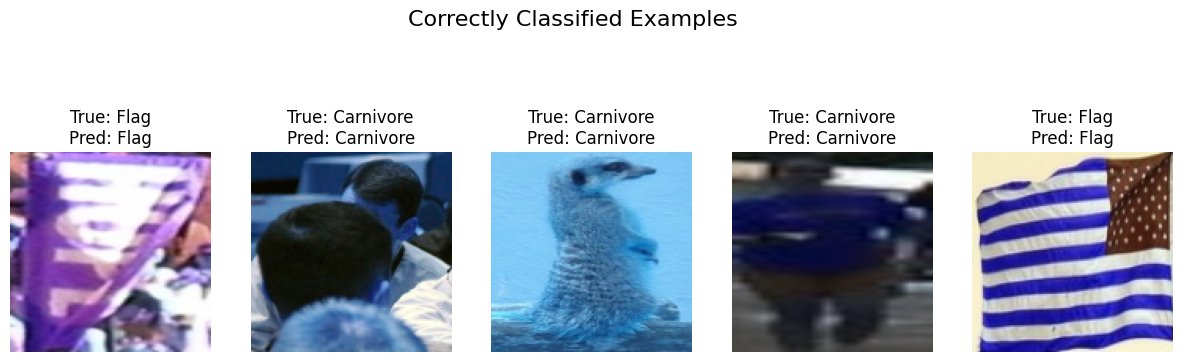

In [20]:
import matplotlib.pyplot as plt

# Function to display examples
def display_examples(X, y_true, y_pred, indices, title, num_examples=5):
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(indices[:num_examples]):
        plt.subplot(1, num_examples, i + 1)
        plt.imshow(X[idx])
        plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred[idx]]}")
        plt.axis("off")
    plt.suptitle(title, fontsize=16)
    plt.show()

# Display correctly classified examples
class_names = ["Carnivore", "Flag"]
display_examples(X_test, y_test, y_pred_mlp, correct_indices, title="Correctly Classified Examples")

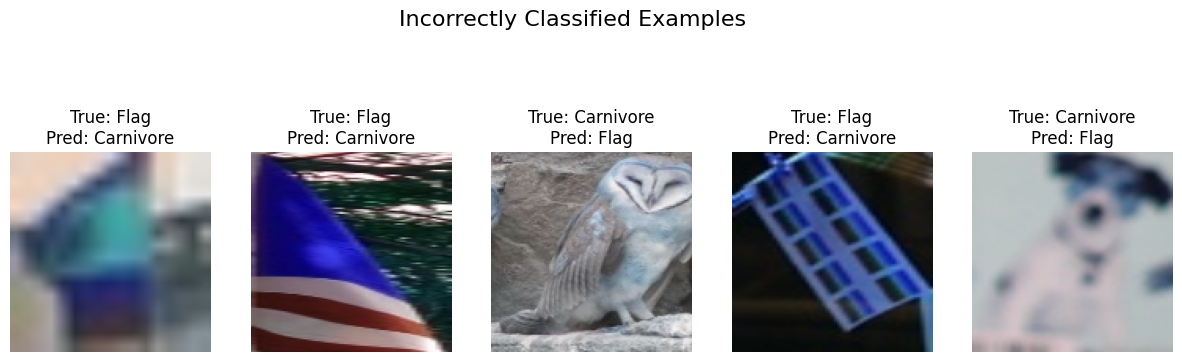

In [21]:
# Display incorrectly classified examples
display_examples(X_test, y_test, y_pred_mlp, incorrect_indices, title="Incorrectly Classified Examples")